<a href="https://colab.research.google.com/github/Selciya20102005/colab_projects/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

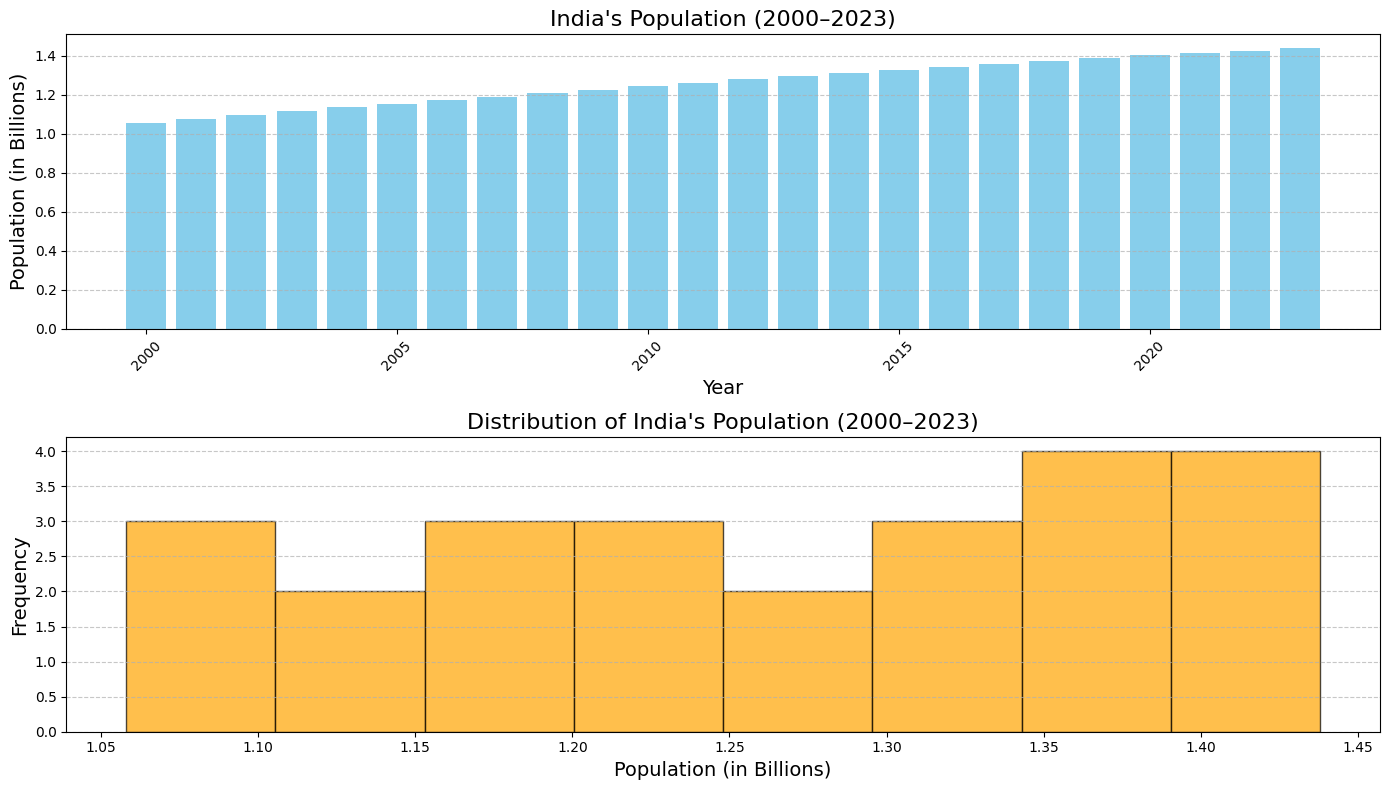

In [ ]:
#TASK 1

import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Path to the ZIP file
zip_path = "/content/API_SP.POP.TOTL_DS2_en_csv_v2_900.zip"

# Extract the specific file from the ZIP archive
with zipfile.ZipFile(zip_path, 'r') as z:
    # Extract the main dataset
    dataset_filename = 'API_SP.POP.TOTL_DS2_en_csv_v2_900.csv'
    z.extract(dataset_filename, '/content')  # Extract it to the content directory

# Load the extracted dataset
data_path = "/content/API_SP.POP.TOTL_DS2_en_csv_v2_900.csv"
population_data = pd.read_csv(data_path, skiprows=4)  # Skip metadata rows

# Filter data for India
india_population = population_data[population_data['Country Name'] == 'India']

# Select relevant columns (Years 2000–2023)
india_population_years = india_population.loc[:, '2000':'2023'].transpose().reset_index()

# Rename columns for clarity
india_population_years.columns = ['Year', 'Population']
india_population_years['Year'] = india_population_years['Year'].astype(int)
india_population_years['Population'] = india_population_years['Population'].astype(float)

# Create a bar chart for India's population (2000–2023)
plt.figure(figsize=(14, 8))

# Bar Chart
plt.subplot(2, 1, 1)  # First subplot
plt.bar(india_population_years['Year'], india_population_years['Population'] / 1e9, color='skyblue')
plt.title("India's Population (2000–2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Population (in Billions)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram
plt.subplot(2, 1, 2)  # Second subplot
plt.hist(india_population_years['Population'] / 1e9, bins=8, color='orange', edgecolor='black', alpha=0.7)
plt.title("Distribution of India's Population (2000–2023)", fontsize=16)
plt.xlabel("Population (in Billions)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the charts
plt.show()


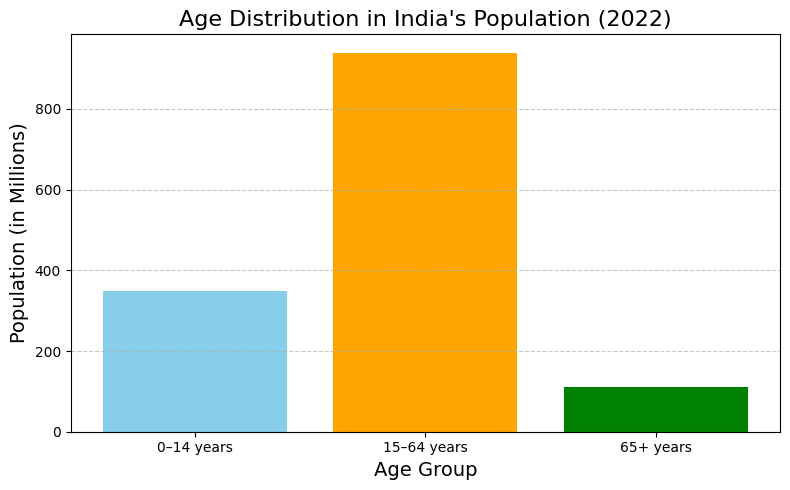

In [ ]:
#Age Distribution

import matplotlib.pyplot as plt

# Simulated age distribution for 2022 (based on UN World Population data proportions)
total_population_2022 = 1400e6  # India's population in 2022 (approx 1.4 billion)
age_distribution = {
    '0–14 years': 0.25 * total_population_2022,  # 25% of the population
    '15–64 years': 0.67 * total_population_2022,  # 67% of the population
    '65+ years': 0.08 * total_population_2022,  # 8% of the population
}

# Create a bar chart for the age distribution
plt.figure(figsize=(8, 5))
plt.bar(age_distribution.keys(), [v / 1e6 for v in age_distribution.values()], color=['skyblue', 'orange', 'green'])
plt.title("Age Distribution in India's Population (2022)", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Population (in Millions)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()


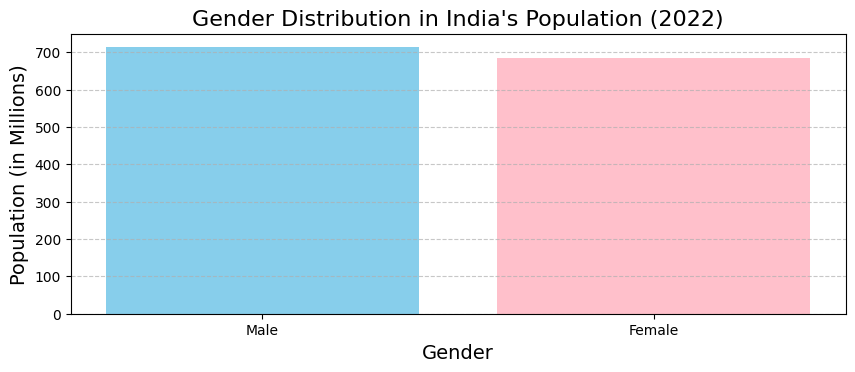

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated gender distribution for 2022
total_population_2022 = 1400e6  # India's population in 2022 (approx 1.4 billion)
gender_distribution = {
    'Male': 0.51 * total_population_2022,  # 51% of the population
    'Female': 0.49 * total_population_2022,  # 49% of the population
}

# Simulate a dataset for the histogram
gender_data = np.concatenate((
    np.repeat("Male", int(gender_distribution['Male'] / 1e6)),
    np.repeat("Female", int(gender_distribution['Female'] / 1e6))
))

# Create a bar chart for Gender Distribution
plt.figure(figsize=(10, 8))

# Bar Chart
plt.subplot(2, 1, 1)
plt.bar(
    gender_distribution.keys(),
    [v / 1e6 for v in gender_distribution.values()],
    color=['skyblue', 'pink']
)
plt.title("Gender Distribution in India's Population (2022)", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Population (in Millions)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import plotly.graph_objects as go

# Sample data (replace with your actual data)
age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']
male_population = [1000, 1200, 1500, 1800, 2000, 1900, 1700, 1500, 1300, 1100, 900, 700, 500, 400]
female_population = [950, 1150, 1400, 1700, 1900, 1800, 1600, 1400, 1200, 1000, 800, 600, 450, 350]

# Apply negative sign to male population (each element individually)
male_population_negative = [-x for x in male_population]

# Create traces for male and female populations
male_trace = go.Bar(
    y=age_groups,
    x=male_population_negative,  # Negative values for males
    orientation='h',
    name='Male',
    marker=dict(color='lightblue')
)

female_trace = go.Bar(
    y=age_groups,
    x=female_population,
    orientation='h',
    name='Female',
    marker=dict(color='pink')
)

# Create the layout
layout = go.Layout(
    title='Population Pyramid',
    barmode='overlay',
    xaxis=dict(
        title='Population',
        tickvals=[-2000, -1500, -1000, -500, 0, 500, 1000, 1500, 2000],
        ticktext=['2M', '1.5M', '1M', '0.5M', '0', '0.5M', '1M', '1.5M', '2M']
    ),
    yaxis=dict(
        title='Age Group'
    )
)

# Create the figure
fig = go.Figure(data=[male_trace, female_trace], layout=layout)

# Show the plot
fig.show()
